<a href="https://colab.research.google.com/github/jonshiach/Outreach/blob/main/music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/MMU_logo.png" width=150 align="right"/>
<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/python_logo.png" width="150" align="right"/>

# Using Mathematics to Make and Stream Music 

---
<table align="center">
    <tr>
        <td align="left">
            <span style="font-weight:normal">
                <b>Dr Jon Shiach</b> <br><br>
                Senior Lecturer <br>
                Department of Computing and Mathematics<br>
                Manchester Metropolitan University<br> 
                Email: <a href="mailto:j.shiach@mmu.ac.uk">j.shiach@mmu.ac.uk</a>
            </span>
        </td>
        <td>
            <img width="100" src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/jon_shiach.jpeg">
        </td>
        <td align="left">
            <span style="font-weight:normal">
                <b>Dr Stephen Lynch</b> <br><br> 
                Reader <br> 
                Department of Computing and Mathematics<br>
                Manchester Metropolitan University<br>
                Email: <a href="mailto:s.lynch@mmu.ac.uk">s.lynch@mmu.ac.uk</a>
            </span>
        </td>
        <td>
            <img width="100" src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/stephen_lynch.jpeg">
        </td>
        <td>
            <span style="font-weight:normal">
                <b>Dr Killian O"Brien</b> <br><br>
                Senior Lecturer <br>
                Department of Computing and Mathematics<br>
                Manchester Metropolitan University<br> 
                Email: <a href="mailto:k.m.obrien@mmu.ac.uk">k.m.obrien@mmu.ac.uk</a>
            </span>
        </td>
        <td>
            <img width="100" src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/killian_obrien.jpeg">
        </td>
    </tr>
</table>

---

## Introduction
This Jupyter notebook is designed to accompany a session which introduces you to the mathematics used in the creating of digital music and also the streaming of music which is used by applications such as Spotify, YouTube and TikTok. Whilst some of the mathematics required is ordinarily taught at degree level, to follow the content of this notebook you just need an understanding of **radians**, the **sine** and **cosine** functions (which are covered in the preliminaries section below) and a little curiosity. This notebook contains some Python code to perform calculations, produce plots and play audio signals. No programming experience is necessary to follow the examples, however, readers can make changes to the code and execute to see what affects any changes has on the output.

---
<a name="Preliminaries"></a>
## Some mathematical preliminaries

Here I will introduce you to the mathematical and Python concepts that you need to understand the content of this notebook. 

### Radians

A radian is simply a measure of the size of an angle. You may be familiar with measuring angles with degrees where there are $360^\circ$ in a circle and a right-angle is $90^\circ$ and so on. In mathematics we prefer to measure angles in radians because it is more convenient for some applications and makes our formulas more elegant. 

Consider the diagram on the right. To define a radian we do the following 
<img align="right" src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/radian.svg" width=200>

1. Draw a circle.
1. Draw a line from the centre to the edge of the circle.
1. Where your line meets the edge of the circle, draw an arc around the circle which has the same length as the radius of your circle.
1. Where your arc ends, draw a line to the centre of the circle

The angle between the two lines that meet at the centre is 1 radian. Since the circumference of the circle can be calculated using $2\pi r$ then length of our arc is 

$$r = 2 \pi r \left( \dfrac{1 \text{ rad}}{360^\circ} \right).$$

Rearranging this gives the conversion between degrees and radians of $360^\circ = 2\pi \text{ rad}$ (the unit $\text{rad}$ is usually omitted).

### The sine and cosine functions

<img width=250 align="right" src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/triangle.svg">

The sine and cosine functions are used in trigonometry to calculate the length of the sides of a right-angled triangle. Consider the triangle $ABC$ where the angle at point $B$ is a right-angle. The longest side of the triangle is labelled the **hypotenuse** and the two shorter sides are labelled **adjacent** and **opposite** depending on their position relative to the angle $\theta$ (the character $\theta$ is the Greek letter _theta_ and is commonly used to represent angles in mathematics) which in this is at the point $A$. The definition of the sine and cosine functions are related to the lengths of the sides of a right-angled triangle as follows

\begin{align*}
    \sin(\theta) &= \frac{\text{opposite}}{\text{hypotenuse}}, &
    \cos(\theta) &= \frac{\text{adjacent}}{\text{hypotenuse}}.
\end{align*}

So if $\theta = 0.6435$ and the length of the hypotenuse is $5$ then we can calculate the length of the opposite and adjacent sides using

\begin{align*}
    \text{opposite} &= \text{hypotenuse} \times \sin(\theta) = 5\sin(0.6435) \approx 3, \\
    \text{adjacent} &= \text{hypotenuse} \times \cos(\theta) = 5\cos(0.6435) \approx 4.
\end{align*}

We can check whether these are correct using the [Pythagorean theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem), i.e., $5 ^ 2 = 3 ^ 2 + 4 ^ 2 = 9 + 16 = 25$.

### Python

Python is an easy to learn programming language that is has become very popular with programmers, data scientists, web developers and of course mathematicians. Python is *open source* meaning that it is free to download to any computer, we recommend downloading [**Anaconda**](https://www.anaconda.com/products/individual) which is suite of software that includes Python and Jupyter notebook.

### Jupyter notebooks

Jupyter notebooks are documents that combine text and Python code which allow readable documents such as this one to be created that contain executable code used to perform calculations. To run code in a notebook simply click on the code and then on the run button, or alternatively, press the **ctrl + enter** keys at the same time. Since we will be using commands to perform calculations, produce plots of audio signals, reading and playing audio files we need to import some commands to help us to do this. Run the code below to import the commands.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Audio
from scipy.io import wavfile

plt.rcParams['text.usetex'] = True
plt.rc('axes', labelsize=14)
plt.rc('axes', titlesize=16)
plt.rcParams["figure.figsize"] = (12, 4)

Now we can perform some calculations. The Python code below calculates the length of the opposite side of the right-angled triangle from the example calculation above and prints the result. Note how the equation `opposite = 5 * np.sin(0.6435)` is entered in a similar way to how we write it on a piece of paper. Can you add a couple of lines of code to calculate the length of the adjacent side as well?

In [2]:
opposite = 5 * np.sin(0.6435)
print(opposite)

2.999995564825018


---
## Co-ordinates of points on a circle

<img align=right src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/circle.svg" width=300>

We can use sine and cosine functions to calculate the co-ordinates of points on a circle. Consider the diagram on the right which shows the upper right-hand quadrant of a circle which is centred at the origin and has a radius of $r$. For every point in this quadrant of the circle we can form a right angled triangle where the length of the hypotenuse is $r$. If the angle $\theta$ is the angle between the $x$ axes and the hypotenuse then $x$ co-ordinate of the point on the circle is equal to the length of the adjacent side of the triangle and the $y$ co-ordinate is equal to the length of the opposite side, therefore

$$ (x, y) = (r \cos(\theta), r \sin(\theta)). $$

We can continue this for the other quadrants in the circle, i.e., for angles $\theta > \dfrac{\pi}{2}$. 

The Python code below calculates the co-ordinates of $n = 10$ points on a circle with radius $r=2$ using values of $\theta$ from $0$ to $2\pi$. The radius is defined by the command `r = 2` and $\theta$ values are calculated and stored in `theta`. Then the $x$ and $y$ co-ordinates are calculated and stored in `x` and `y` which are then used to plot the points on the circle.

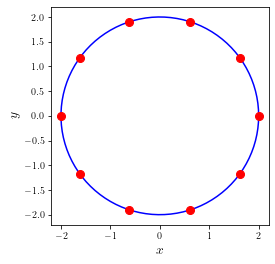

In [25]:
# Calculate (x, y) co-ordinates for points on a circle
r = 2                                   # radius of the circle
n = 10                                  # number of points
theta = np.arange(n) * 2 * np.pi / n    # calculate θ values
x = r * np.cos(theta)                   # calculate x = r cos(θ)
y = r * np.sin(theta)                   # calculate y = r sin(θ)

# Plot circle
theta = np.linspace(0, 2 * np.pi, 100)                # generate 100 values of θ in the range 0 <= θ <= 2π 
fig, ax = plt.subplots()
plt.plot(r * np.cos(theta), r * np.sin(theta), "b")   # plot the circle
plt.plot(x, y, "ro", ms=8)                            # plot the points on the circle
ax.set_aspect("equal")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

---
<a name="Sine-waves"></a>
## Sine waves

We can plot the $y$ co-ordinate of the points on the circle against the values of $\theta$ by plotting the point with co-ordinates $(\theta, \sin(\theta))$ on an axes and drawing a smooth line connecting the points. Run the Python code below to see the affect.

In [26]:
A = 1    # Amplitude
f = 1    # Frequency

# Setup figure and axes
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
ax[0].set_xlim(-A - 0.1, A + 0.1)
ax[0].set_ylim(-A - 0.1, A + 0.1)
ax[0].set_aspect('equal')
ax[0].axis('off')
ax[1].set_xlim(0, 4 * np.pi)
ax[1].set_ylim(-A - 0.1, A + 0.1)
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel(r'$\sin(\theta)$')
ax[1].set_xticks(np.pi * np.arange(5))
ax[1].set_xticklabels(["0", r"$\pi$", r"$2\pi$", r"$3\pi$", r"$4\pi$"])
ax[1].set_yticks([-1, 0, 1])
ax[1].set_yticklabels([f"$-{A}$", "$0$", f"${A}$"])

# Axis 1 elements
theta = np.linspace(0, 4 * np.pi, 200)
x, y = A * np.cos(f * theta), A * np.sin(f * theta)
ax[0].plot(x, y, 'b', lw=0.5)
ax[0].plot([-A - 0.2, A + 0.2], [0, 0], 'k', lw=0.5)
ax[0].plot([0, 0], [-A - 0.2, A + 0.2], 'k', lw=0.5)
line1, = ax[0].plot([], [], 'k', lw=0.5)
line2, = ax[0].plot([], [], 'k', lw=0.5)
pt1, = ax[0].plot([], [], 'ro', ms=8)

# Axis 2 elements
line3, = ax[1].plot([], [], 'b-')
pt2, = ax[1].plot([], [], 'ro', ms=8)
    
# Animation function
def animate(n):
    line1.set_data([0, x[n], x[n], 0], [0, y[n], 0, 0])
    line2.set_data(0.2 * x[:n], 0.2 * y[:n])
    line3.set_data(theta[:n], y[:n])
    pt1.set_data(x[n], y[n])
    pt2.set_data(theta[n], y[n])
    
anim = FuncAnimation(fig, animate, frames=200, interval=40)
plt.close()
HTML(anim.to_jshtml())

Note how the curve repeats itself after $\theta = 2\pi$ and it will continue to do so as $\theta$ increases to infinity. We call a curve that repeats itself a **periodic** curve and the **period** is the value of $\theta$ when the curve starts to repeat itself.

---
<a name="Amplitude"></a>
### Amplitude

The **amplitude** of a wave is the largest difference between the wave and zero. Since our sine curve is related to the $y$ co-ordinates of points on a [circle](#Co---ordinates-of-points-on-a-circle) which are at their largest when $\theta = \dfrac{\pi}{2}$ and $\theta = \dfrac{3\pi}{2}$ (here we are ignoring the sign of $y$) where $\sin(\theta) = 1$ is equal to the radius of the circle. Therefore we can increase or decrease the amplitude of a sine wave by changing the radius of the circle. So if we say that $A$ is the amplitude then $r=A$ and the sine curve is 

$$y = A \sin(\theta).$$

<p align="center">
<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/amplitude.svg" width=600>
</p>

In audio signals, we can think of the amplitude as being the volume of the sound.

The code below plots the curve of $y = A\sin(\theta)$ for $\theta$ values in the range $0 \leq \theta \leq 4\pi$. Try experimenting with changing the value of `A` and see what affects this has on the shape of the curve. To do this change `A = 2` to a different number, e.g., `A = 3`, and click on the run button (or press **ctrl + enter** at the same time).

In [5]:
# Calculate y = A sin(θ) for the range 0 <= θ <= 4π
A = 2   # amplitude
theta = np.linspace(0, 4 * np.pi, 10000)
y1 = np.sin(theta)
y2 = A * np.sin(theta)

# Plot the sine curves
fig, ax = plt.subplots()
plt.plot(theta, y1, "b", label=r"$y = \sin(\theta)$")             # plot y = sin(θ)
plt.plot(theta, y2, "r", label=rf"$y = {A} \sin(\theta)$")        # plot y = A sin(θ)
plt.xlabel(r"$\theta$")
plt.ylabel("$y$")   
plt.xticks(np.arange(5) * np.pi, ["0", "$\pi$", "$2\pi$", "$3\pi$", "$4\pi$"])
plt.legend(fontsize=12)         
plt.show()

---
<a name="Frequency"></a>
### Frequency

The **frequency** of a wave is the number of times the wave repeats over an interval of $0 \leq \theta \leq 2\pi$ radians. If we consider the [points on a circle from before](#Sine-waves), if we multiply the angle $\theta$ by 2 before calculating the $(x, y)$ co-ordinates of the points on the circle then the points will do 2 revolutions of the circle over the interval $0 \leq \theta \leq 2\pi$. The curve of $y = \sin(2\theta)$ will look like the diagram below

<p align="center">
<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/frequency.svg" width=600>
</p>

The frequency of a sine wave is represented using $f$ so our sine function becomes

$$ y = \sin(f \theta). $$

By increasing the value of $f$ we increase the number of times we do a revolution of the circle which has the affect of reducing the spacing between the peaks and troughs of the sine wave. In audio signals we think of the frequency as the pitch of the sound. Waves with higher frequencies have a higher pitched sound and waves with lower frequencies have a lower pitched sound. 

The code below plots the curve of $y = \sin(f\theta)$ for $\theta$ values in the range $0 \leq \theta \leq 4\pi$. Try experimenting with changing the value of the frequency `f` and see what affects this has on the shape of the wave.

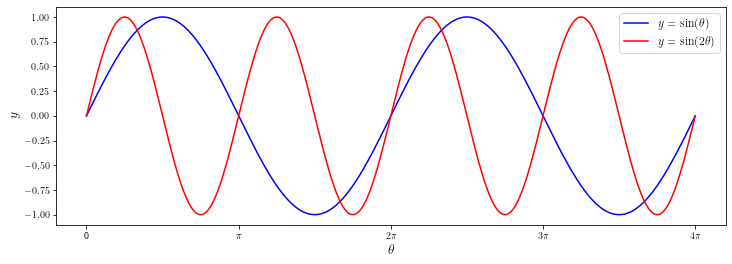

In [29]:
# Calculate y = sin(f θ) for the range 0 <= θ <= 4π
f = 2    # frequency
theta = np.linspace(0, 4 * np.pi, 10000)
y1 = np.sin(theta)
y2 = np.sin(f * theta)

# Plot sine wave
fig, ax = plt.subplots()
plt.plot(theta, y1, "b", label=r"$y = \sin(\theta)$")             # plot y = sin(θ)
plt.plot(theta, y2, "r", label=rf"$y = \sin({f}\theta)$")         # plot y = sin(fθ)
plt.xlabel(r"$\theta$")
plt.ylabel("$y$")
plt.xticks(np.arange(5) * np.pi, ["0", "$\pi$", "$2\pi$", "$3\pi$", "$4\pi$"])
plt.legend()           
plt.legend(fontsize=12,loc="upper right")      
plt.show()

---
<a name="Phase angle"></a>
### Phase angle

The **phase angle** of a sine wave is an angle $\phi$ ($\phi$ is the Greek character *phi*) that is added to the angle $\theta$ within the sine function, i.e.,

$$y = \sin(\theta + \phi).$$

If we think about the [points on a circle from before](#Sine-waves), adding a positive phase angle $\phi$ to $\theta$ before calculating the $(x, y)$ co-ordinate of a point on a circle moves the point further around the circle in the anti-clockwise direction. The affect this has on the sine wave is to shift it to the left along the $\theta$ axis by the distance $\phi$ as shown in the diagram below. Adding a negative $\phi$ value will shift the wave to the right.

<p align="center">
    <img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/phase.svg" width=600>
</p>

In music we can think of the phase angle as introducing a delay in the sound.

The code below plots the the curve of $y = \sin(\theta + \phi)$ for $\theta$ values in the range $0 \leq \theta \leq 4\pi$. Try experimenting with changing the value of the phase angle `phi` and see what affects this has on the sine curve.

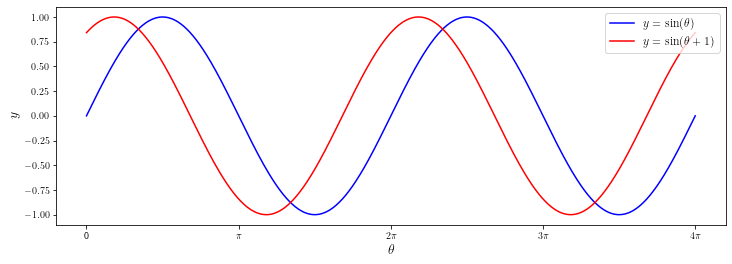

In [34]:
# Calculate y = sin(θ + ϕ) for the range 0 <= θ <= 4 pi
phi = 1   # phase angle
theta = np.linspace(0, 4 * np.pi, 10000)
y1 = np.sin(theta)
y2 = np.sin(theta + phi)

# Plot sine functions
fig, ax = plt.subplots()
plt.plot(theta, y1, "b", label=r"$y = \sin(\theta)$")             # plot y = sin(θ)
plt.plot(theta, y2, "r", label=rf"$y = \sin(\theta + {phi})$")     # plot y = sin(θ + ϕ)
plt.xlabel(r"$\theta$")
plt.ylabel("$y$")
plt.xticks(np.arange(5) * np.pi, ["0", "$\pi$", "$2\pi$", "$3\pi$", "$4\pi$"])
plt.legend(fontsize=12, loc="upper right")       
plt.show()

---
<a name="Adding-sine-waves-together"></a>
### Adding sine waves together

So we have seen that we can control the shape of a sine wave by changing the amplitude ($A$) frequency ($f$) and phase angle ($\phi$). Combining these we have the following function that describes a sine wave

$$y = A \sin(f\theta + \phi).$$

We can also add sine waves together which will form other waves. For example the diagram below shows the sum of the three sine waves with amplitudes $A = 2, \dfrac{2}{3}, \dfrac{2}{5}$ and frequencies $f = 1, 3, 5$ so the wave can be described by

$$y = 2 \sin(\theta) + \frac{2}{3}\sin(3\theta) + \frac{2}{5}\sin(5\theta).$$

<p align="center">
    <img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/sum_sines.svg" width=600>
</p>

The code below calculates the sum of 3 sine waves with different values for $A$, $f$ and $\phi$. Note how by adding these sine functions together we have a curve that resembles a music signal. This means that we can represent a music signal as the sum of multiple sine waves! Try experimenting with creating different waves by changing the values of the amplitudes `A`, frequencies `f` and phase angles `phi`. Make sure that the that the number of values you define for each of these must be the same, e.g., if you add another value to `A` you wil also need to add another value to `f` and `phi` (which could be `0`).

In [8]:
# Define the amplitudes, frequences and phase angles
A = [2, 2/3, 2/5]    # amplitudes
f = [1, 3, 5]        # frequencies
phi = [0, 0, 0]      # phase angles

# Calculate the sum of the sine waves
theta = np.linspace(0, 4 * np.pi, 10000)
y = np.zeros(theta.shape)
for i in range(len(A)):
    y += A[i] * np.sin(f[i] * theta + phi[i])

# Plot sine functions
fig, ax = plt.subplots(len(A) + 1, 1, figsize=(12, 2 * (len(A) + 1)))
for i in range(len(A)):
    ax[i].plot(theta, A[i] * np.sin(f[i] * theta + phi[i]), "b", label=rf"$y = {A[i]:0.2f}\sin({f[i]}\theta + {phi[i]})$")
    ax[i].set_ylabel("$y$")
    ax[i].set_ylim([-1.2 * max(A), 1.2 * max(A)])
    ax[i].set_xticks(np.arange(5)* np.pi)
    ax[i].set_xticklabels(["0", "$\pi$", "$2\pi$", "$3\pi$", "$4\pi$"])
    ax[i].legend()
    
plt.plot(theta, y, "r", label="sum of sines")
plt.xlabel(r"$\theta$")
plt.ylabel("$y$")
plt.legend()
fig.tight_layout()
plt.show()

---
<a name="Using-sine-waves-to-make-music"></a>
## Using sine waves to make music

Now that we know how to work with sine waves we are now look at how they can be used to make audio signals of musical notes and chords. The mathematics shown here is used in electronic instruments such as keyboards to produce sounds.

Here we will try to recreate piano notes using sine waves. There are 88 keys on a standard modern piano, 52 white keys and 36 black keys. When a key is pressed it causes a hammer to strike a string and the vibration of the string disturbs the air to produce the sound we hear. In a real acoustic instrument the sound of the note decreases over time. The keys to the left of the piano produce notes with a lower pitch and the keys to the right produces notes is a higher pitch.

<p align="center">
    <img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/piano.svg" width=100%>
</p>

So if we want to recreate piano notes we need to be able to produce audio signals that have the same pitch as a piano note and we need the volume to decrease over time.

<a name="Generating-a-musical-note"></a>
### Generating a musical note

An audio signal is represented over time so we need a way to convert between the angle $\theta$ in the sine function and time $t$ in seconds. The unit of measure for frequency is **Hertz** abbreviated to Hz (named after German physicist Heinrich Rudolf Hertz, 1857 - 1894), which is defined as the number of cycles per second. So if we have a signal with a frequency of 1 Hz the one cycle of a [circle](#Sine-waves) is equivalent to 1 second in time. Since there are $2\pi$ radians in a circle then $\theta = 2\pi f t$, so an audio signal with frequency $f$ Hz can be generated by the following sine function (we will ignore the phase angle from now on)

\begin{align*}
    s(t) = A \sin(2\pi f t).
\end{align*}

The values for $t$ in an music signal are typically calculated using a **sampling rate** of 44,100 Hz which means that each second of the signal is represented by 44,100 values of $t$ so the total number of values in the signal can be calculated using 

$$N = \text{sampling rate} \times \text{signal length}.$$

The sampling rate of 44.1 kHz is the standard sample rate use for music, other audio sources such as speech use a lower sampling rate of 8 kHz since they do not require as much clarity as music signals.

The code below calculates a signal of 2 seconds in length with a frequency of 440 Hz which is sampled using a sampling rate of 44.1 kHz. The amplitude of the signal is reduced over time to model the decrease in volume that we would hear in an acoustic instrument. The code also plots the sine wave and creates widget which allows us to play the signal and listen to the audio.

> ***NOTE:***  Make sure you turn the volume on your computer down a bit before playing the signal, especially if you are wearing headphones!

In [9]:
# Define note parameters
frequency = 440                           # frequency of the note in Hz
length = 2                                # length of the signal in seconds
samplerate = 44100                        # sampling rate in Hz
N = length * samplerate                   # number of sample values

# Calculate the note signal
t = np.arange(N) / samplerate;            # calculate time values
note = np.sin(2 * np.pi * frequency * t)  # calculate note signal

# Reduce the amplitude over time
note *= ((length - t) / length) ** 2

# Plot the signal
fig, ax = plt.subplots()
plt.plot(t, note, "b")
plt.xlabel("time (seconds)")
plt.ylabel("$s(t)$")
plt.show()

# Play the note signal
Audio(note, rate=samplerate)

The plot above may not look much like a sine wave but if we plot the first 0.01 seconds we can see we have a sine wave which repeats approximately every 0.0023 seconds which is $\dfrac{1}{440}$. 

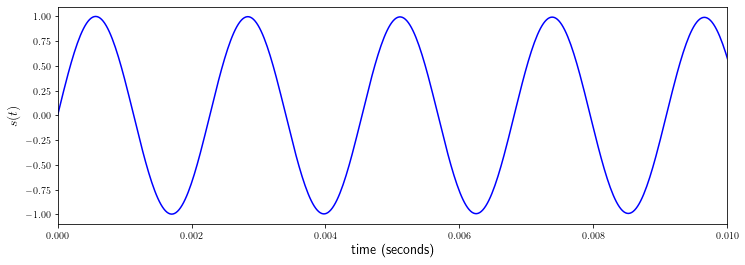

In [10]:
ax.set_xlim(0, 0.01)
display(fig)

The note with the frequency 440 Hz is known in music as the note **A4** or **A over middle C** (middle C is the note near the middle of the range of pitch of a piano). This note is used as the standard reference for tuning modern western instruments. Try experimenting with changing the `frequency` and `length` parameters to produce other notes (a list of the different frequencies for the notes on a piano can be found on [wikipedia](https://en.wikipedia.org/wiki/Piano_key_frequencies)).

<a name="Generating-a-musical-chord"></a>
---
### Generating a musical chord

As well as individual notes, music is also played using **chords** which are a combination of three or more different notes played at the same time. For example, the A chord consists of the notes A, C# and E.

<p align="center">
    <img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/Achord.svg" width=400>
</p>

We can generate an audio signal of a chord by adding together the sine waves for each of the individual notes. The frequencies of the notes in a chord are related by a **frequency ratio** which are given in the table below for the most common type of chords. 

| Chord | Frequency ratio |
|:--|:--:|
| Major | 4:5:6 |
| Minor | 10:12:15 |
|Diminished | 20:24:29 |
| 7th | 20:25:30:36 |

Since the note A4 has a frequency of 440 Hz, and the major chord has the frequency ratio 4:5:6 so the two other notes in the A4 major chord (C#5 and E5) have frequencies $\frac{5}{4} \times 440 = 550$ Hz and $\frac{6}{4} \times 440 = 660$ Hz . The first note in the chord is known as the **root note**. Therefore the signal for the A4 chord is

$$s(t) = \sin(440\times 2 \pi t) + \sin(550\times 2 \pi t) + \sin(660 \times 2 \pi t).$$

The code below generates a signal of length 2 seconds of a musical chord defined by the frequency of the root note and the frequency ratio. 

In [11]:
# Define chord parameters
frequency = 440             # frequency of the root note in Hz
ratio = [4, 5, 6]           # frequency ratios of the notes in the chord
length = 2                  # length of the signal in seconds
samplerate = 44100          # sampling rate in Hz
N = length * samplerate     # number of sample values

# Generate the chord signal
t = np.arange(N) / samplerate;
chord = np.zeros(t.size)
for i in range(len(ratio)):
    chord += np.sin(ratio[i] / ratio[0] * frequency * 2 * np.pi * t)

# Reduce the amplitude over time
chord *= ((length - t) / length) ** 2
    
# Plot the signal
fig, ax = plt.subplots()
plt.plot(t, chord, "b")
plt.xlabel("time (seconds)")
plt.ylabel("$s(t)$")
plt.show()

# Play the note signal
Audio(chord, rate=samplerate)

In the plot above we can see that we have a signal similar to the one for the single note but with some spikes. A plot of the chord signal for the first 0.04 seconds is generated below. 

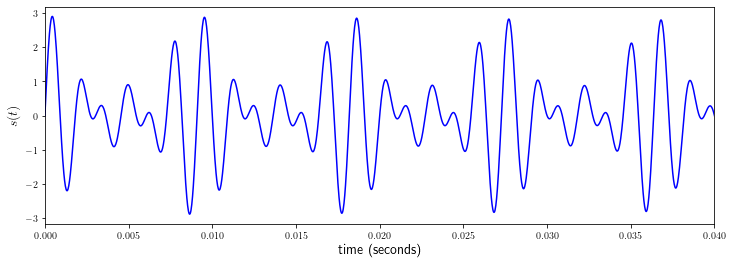

In [12]:
ax.set_xlim(0, 0.04)
display(fig)

Try experimenting by changing the `frequency` of the root note, the frequency `ratio` and the `length` and listen to the affect this has on the sound of the chord.

### Frequency spectrum

When dealing with a signal that is the sum of lots of sine waves it is convenient to represent it as a plot of the amplitude of each of the sine wave in a signal against the freqency. This plot is know as a **frequency spectrum**. For example, the Python code below plots the frequency spectrum for an A4 chord which is the sum of three sine waves with frequencies 440 Hz, 550 Hz and 660 Hz.  

In [13]:
# Define chord parameters
chord_freq = [440, 550, 660]   # frequencies of the notes in the chord

# Calculate the frequency and amplitude
frequency = np.arange(1000)
amplitude = np.zeros(1000)
amplitude[chord_freq] = 1

# Plot amplitude against frequency
fig, ax = plt.subplots()
plt.stem(frequency, amplitude, "b", markerfmt=" ", basefmt="-b")
plt.title("Frequency spectrum")
plt.xlabel("frequency (Hz)")
plt.ylabel("amplitude")
plt.yticks([])
plt.xlim([300, 800])
plt.show()

---
## Analysing audio signals

<img align="left" width=200 title="Joseph Fourier" src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/Fourier.jpeg">

We have seen that audio signals are a collection of sine waves that are added together. We can use an amazing mathematical tool called the **Fourier transform**, named after the French mathematician Joseph Fourier (1778 - 1830), which can calculate the amplitudes and frequencies of the sine waves that form an audio signal. By analysing the sine waves in an audio signal we can remove frequencies that are inaudible to a human. Fourier discovered the Fourier series in 1822 when he was attempting to solve an equation to model the transfer of heat. It would have never had occurred to him that the Fourier transform would be used for analysing signals since the technology for recording, transmitting and analysing signals didn"t exist until over a hundred years later. There are many examples in mathematics where a discovery has applications in other areas other than that which was the original intention, this is one of the things that makes mathematics such a fascinating subject.

The following Python code reads the wave file `Fur_Elise.wav` which contains the first 12 seconds of a recording of a performance of Beethoven"s *Fur Elise*. The code outputs the sample rate which the music was recorded, the number of sample points in the audio signal, the length of the signal in seconds and creates a widget allowing us to hear the signal.

In [14]:
# Download audio file
import urllib.request 
urllib.request.urlretrieve("https://jonshiach.github.io/files/outreach/Fur_Elise.wav", "Fur_Elise.wav")

# Read in the audio signal and output signal information
filename = "Fur_Elise.wav"
samplerate, signal = wavfile.read(filename)
N = signal.size
print(f"audio file        : {filename}")
print(f"sample rate       : {samplerate} Hz")
print(f"no. sample points : {N}")
print(f"signal length     : {N / samplerate:0.1f} s")

# Play audio signal
Audio(signal, rate = samplerate)

audio file        : Fur_Elise.wav
sample rate       : 44100 Hz
no. sample points : 529201
signal length     : 12.0 s


We can see that the audio has been recorded using a sample rate of 44.1 kHz, the audio signal is made up of 529201 sample points so the length of the signal is $\dfrac{529201}{44100} = 12$ seconds. The code below plots the ampltiude against time for all 12 seconds of the signal. 

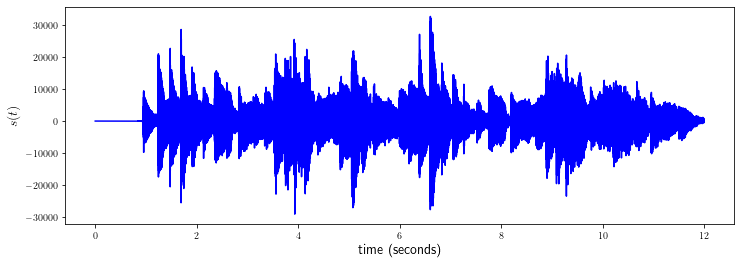

In [15]:
# Plot audio signal
time = np.arange(signal.size) / samplerate
fig, ax = plt.subplots()
plot = plt.plot(time, signal, "b")
plt.xlabel("time (seconds)")
plt.ylabel("$s(t)$")
plt.show()

We can see that the first second is silent since the amplitude is zero before we see some spikes in the amplitude. These correspond to the notes that we can hear are being played. It may be difficult to see how this signal can be made up of sine waves but if we plot the signal over a period of 0.02 seconds we can see the similarities between the audio signal and the [sum of the sine waves from before](#Adding-sine-waves-together).

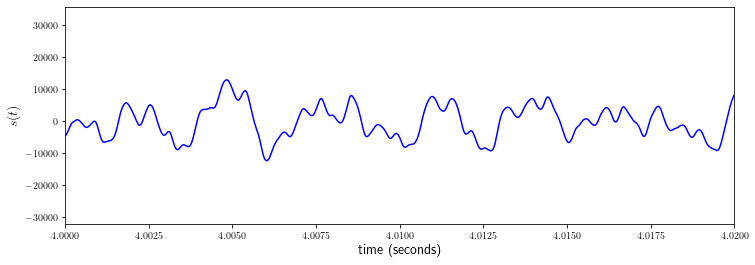

In [16]:
ax.set_xlim(4, 4.02)
display(fig)

The Fourier transform converts a signal expressed over time (known as the **time domain**) to the amplitudes and frequencies of the sine waves that form the signal (known as the **frequency domain**). The following code calculates the Fourier transform for our audio signal and plots the [frequency spectrum](#Frequency-spectrum). The frequencies with the largest amplitudes are the dominant sine waves in a signal.

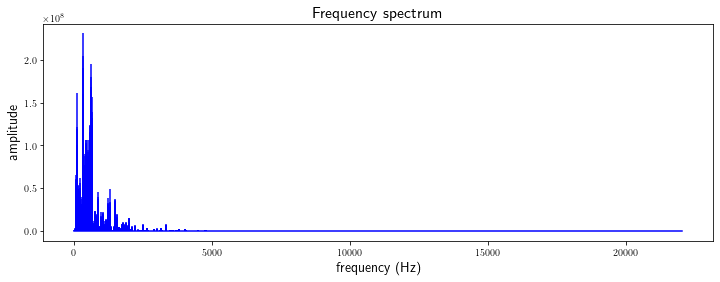

In [17]:
# Calculate the Fourier transform of the audio signal
fourier = np.fft.rfft(signal)

# Calculate the amplitude and frequencies using the Fourier transform  
amplitude = abs(fourier)
frequency = np.fft.rfftfreq(N, d=1.0 / samplerate)

# Plot amplitude against frequency
fig, ax = plt.subplots()
plt.stem(frequency, amplitude, "b", markerfmt=" ", basefmt="-b")
plt.title("Frequency spectrum")
plt.xlabel("frequency (Hz)")
plt.ylabel("amplitude")
plt.show()

Here the sine waves with lower frequencies have the larger amplitudes and the higher frequencies have almost zero amplitude. This makes sense because this signal is of a piece of piano music and the highest note on a piano is C8 which has the frequency 4186 Hz. Let's plot the frequency spectrum for frequences less than 1000 Hz.

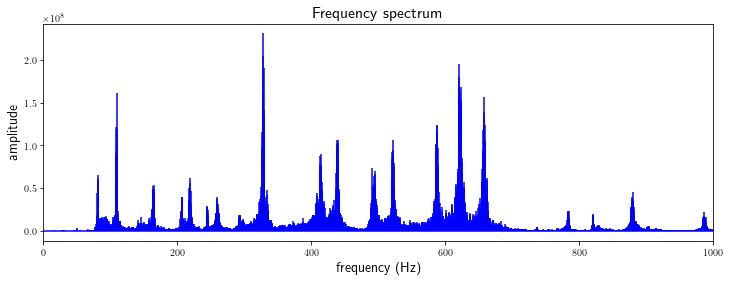

In [18]:
ax.set_xlim(0, 1000)
display(fig)

Looking at the frequency spectrum for the first 1000 Hz we see that we have spikes at certain frequencies. These are the frequencies of the individual notes that are being played in the sample of music. 

---
## Compressing audio signals

Looking at the plots of the frequency spectrum for the audio signal we saw that the higher freqency sine waves had very small amplitudes. This means we should be able to remove these and not notice much difference in the audio signal. This is called **compressing** the audio signal and means it will require less memory and therefore easier to store on a computer and stream over the internet. 

The code below removes all of the sine waves with frequencies higher than 10000 kHz and reconstructs the compressed audio signal using the remaining sine waves.

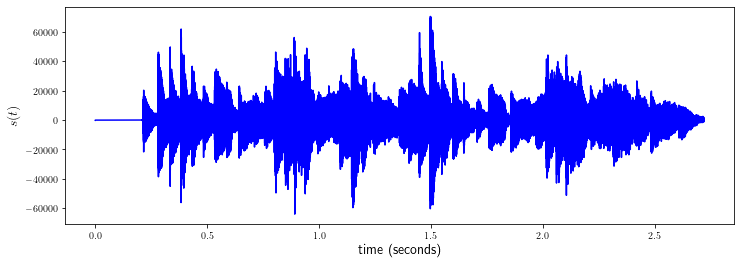

Size of the original signal   : 529201
Size of the compressed signal : 120001
Compression rate (percentage) : 77.32%


In [19]:
# Remove frequencies higher than 4 kHz
threshold = 10000    # cut off threshold
compressed_fourier = fourier[frequency < threshold]

# Reconstruct compressed signal
compressed_signal = np.real(np.fft.ifft(compressed_fourier))
t = np.arange(compressed_signal.size) / threshold

# Plot compressed signal
time = np.arange(compressed_signal.size) / samplerate
fig, ax = plt.subplots(figsize=(12, 4))
plot = plt.plot(time, compressed_signal, "b")
plt.xlabel("time (seconds)")
plt.ylabel("$s(t)$")
plt.show()

# Output signal sizes
print(f"Size of the original signal   : {N}")
print(f"Size of the compressed signal : {compressed_signal.size}")
print(f"Compression rate (percentage) : {(N - compressed_signal.size) / N * 100:0.2f}%")

# Create play widget
Audio(compressed_signal, rate=threshold)

Looking at the plots of the compressed signal they look very similar to the original signal above. Of course we have changed the original signal so we should play it to see (or more appropriately hear) whether the compressed signal sounds the same. You may hear some differences between the original signal and the reconstructed signal. 

The compressed audio signal uses much less memory than the original signal so is easier to stream over the internet. The fewer sine waves that are removed the closer the reconstructed signal will be to the original, but of course this would require more memory. Try experimenting with the `threshold` value to see the affects it has on the audio compression. 

---

## Streaming music to your device

The steps involved for going from the recording of a piece of music to you listening to it on your device are summarised in the flow chart below.
<p align="center">
    <img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/flowchart.svg" width=800>
</p>

1. The music is recorded, digitised and stored as on a computer.
1. The Fourier transform is calculated so that we can analyse the amplitudes and frequencies of the sine waves in the signal.
1. The frequencies that are inaudible to us are discarded (and some other techniques to reduce the memory needed to store the signal are also applied)
1. The inverse Fourier transform is calculated and the compressed sound signal is reconstructed.
1. The compressed sound signal is streamed over the internet to your device allowing you to enjoy the music.

A similar method can be used to help reduce the memory required to store and transmit video signals and are used by applications such as YouTube, TikTok, Netflix etc. to make video streaming possible. Just think, without mathematics and the work of Joseph Fourier 200 years ago, this would not be possible!

---
## Useful Links

If you would like to further explore Python and fractals you may find the following links useful:

- [Anaconda](https://www.anaconda.com/products/distribution) - a suite of software tools that includes Jupyter Notebook and Python. Download and install on your computer to write and run Jupyter notebooks
- [Google Colab](https://colab.research.google.com/) - run Jupyter notebooks in the cloud using Google Colab (you will need to have a Google account to do this)
- [Radian](https://en.wikipedia.org/wiki/Radian)
- [Sine wave](https://en.wikipedia.org/wiki/Sine_wave)
- [Amplitude](https://en.wikipedia.org/wiki/Amplitude)
- [Frequency](https://en.wikipedia.org/wiki/Frequency)
- [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform)

&copy; Dr Jon Shiach 2023